In [15]:
from collections import defaultdict, deque
import graphviz
import networkx as nx

In [6]:
def load_data(datafile):
    caves = defaultdict(list)
    with open(datafile, 'r') as fp:
        for l in fp.readlines():
            a, b = l.strip().split('-')
            caves[a].append(b)
            caves[b].append(a)
    return caves

In [11]:
graph_dict = load_data("test.txt")
graph_dict

defaultdict(list,
            {'start': ['A', 'b'],
             'A': ['start', 'c', 'b', 'end'],
             'b': ['start', 'A', 'd', 'end'],
             'c': ['A'],
             'd': ['b'],
             'end': ['A', 'b']})

In [16]:
def solve(data_dict, double_visit=False):
    G = nx.Graph()
    for node in data_dict:
        for subnode in data_dict[node]:
            G.add_edge(node, subnode)
    return sum(1 for _ in find_paths(G, double_visit=double_visit))

def find_paths(G, current_path=['start'], double_visit=False):
    current_node = current_path[-1]
    for node in G.neighbors(current_node):
        new_path = current_path + [node]
        if node == 'end':
            yield new_path
        elif node.isupper() or node not in current_path:
            yield from find_paths(G, new_path, double_visit)
        elif double_visit and node != 'start':
            yield from find_paths(G, new_path, False)

In [19]:
data = load_data("input.txt")
solve(data, double_visit=True)

144309

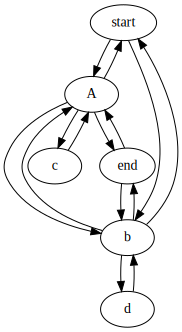

In [14]:
g = graphviz.Digraph('G', filename='graph.gv')
for node in graph_dict:
    for subnode in graph_dict[node]:
        g.edge(node, subnode)
g